In [207]:
import numpy as np
import pandas as pd


In [208]:
rho_0 = 1.2 #空气密度
Q = 10**7 #烧蚀比热
H = 8000
C_d = 1
g = 9.81
#假设小星星参数：
r0 = 50
v0 = 19.2e3
rho_m = 3300
theta0 = 18.3
m0 = (4/3)*np.pi*r0**3*rho_m
x0 = 0.
z0 = 100000.
A = np.pi*r0**2  #横截面积
sin_theta = np.sin(theta0*np.pi/180)
cos_theta = np.cos(theta0*np.pi/180)
tan_theta = np.tan(theta0*np.pi/180)

def euler(tmax,dt) :
    global v,z,x,t
    t = np.linspace(0,tmax,int(tmax/dt)+1)
    v = np.zeros(len(t))
    z = np.zeros(len(t))
    x = np.zeros(len(t))
    v[0] = v0
    z[0] = z0
    for i in range(len(t)-1):
        rho_a = rho_0*np.exp(-z[i]/H)
        v[i+1] = v[i] + dt * (-((C_d*rho_a*A*v[i]**2)/(2*m0))+ g*sin_theta)
        z[i+1] = z[i] + dt * (-v[i]*sin_theta)
        x[i+1] = x[i] + dt* v[i] * cos_theta
      
    

In [209]:
z = pd.Series(z)
x = pd.Series(x)

In [210]:
import matplotlib.pyplot as plt
tmax = 10
dt = 0.05
euler(tmax, dt)

In [211]:
from armageddon import solver
a = solver.Planet()
b = a.solve_atmospheric_entry(radius=r0, velocity=v0, density=rho_m, strength =1e7, angle=theta0)

In [212]:
n = int(tmax/dt)+1
x1 = b['distance'].head(n)
z1 = b['altitude'].head(n)

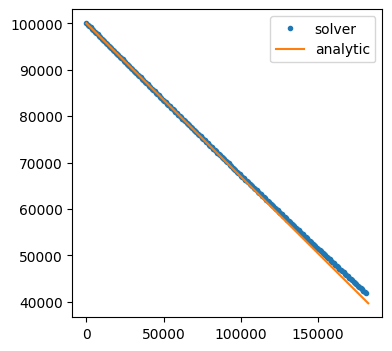

In [213]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)

ax.plot(x1,z1,'.',label='solver') # plot the point (2,3,4) on the figure
ax.plot(x,z,'-',label = 'analytic')
ax.legend()
plt.show()

In [214]:
c = a.calculate_energy(b)
c

,velocity,mass,angle,altitude,distance,radius,time,dedz
0,19200.000000,1.727876e+09,18.300000,100000.000000,0.000000,50.000000,0.00,-0.000000e+00
1,19200.153826,1.727876e+09,18.293320,99698.567242,897.363333,50.000000,0.05,-5.091775e+12
2,19200.307590,1.727876e+09,18.286638,99397.238344,1794.810258,50.000000,0.10,-5.089335e+12
3,19200.461293,1.727876e+09,18.279956,99096.013323,2692.340757,50.000000,0.15,-5.086869e+12
4,19200.614934,1.727876e+09,18.273274,98794.892198,3589.954812,50.000000,0.20,-5.084376e+12
...,...,...,...,...,...,...,...,...
2073,95.239131,2.523581e+08,89.757833,19.048204,293029.470660,392.531975,103.65,7.274936e+08
2074,95.208910,2.523580e+08,89.758767,14.286290,293029.490787,392.531975,103.70,7.267729e+08
2075,95.178711,2.523579e+08,89.759696,9.525887,293029.510830,392.531975,103.75,7.260532e+08
2076,95.148531,2.523578e+08,89.760621,4.766993,293029.530789,392.531975,103.80,7.253344e+08
